# Código do Projeto Final de Estatística e Módulos Probabilísticos

## 1. Dataset

In [1]:
import pandas as pd
import numpy as np

# Importando os datasets como dataframes

df_chromecast = pd.read_csv('data\dataset_chromecast.csv')
df_smarttv = pd.read_csv('data\dataset_smart-tv.csv')

In [2]:
# Conversão das taxas para a escala logarítmica

def log10_scale(df, col):
    df[col] = df[col].replace(0, np.nan)
    df[col] = np.log10(df[col])
    df[col] = df[col].replace(np.nan, 0.0)
    return df


df_chromecast = log10_scale(df_chromecast, 'bytes_down')
df_chromecast = log10_scale(df_chromecast, 'bytes_up')

df_smarttv = log10_scale(df_smarttv, 'bytes_down')
df_smarttv = log10_scale(df_smarttv, 'bytes_up')

## 2. Estatísticas Gerais

### 2.1. Média, Variância e Desvio Padrão

In [3]:
# Calculando + Arredondando os valores para 3 casas decimais:

MEAN_chromecast_down = round(df_chromecast['bytes_down'].mean(), 3)
STD_chromecast_down = round(df_chromecast['bytes_down'].std(), 3)
VAR_chromecast_down = round(df_chromecast['bytes_down'].var(), 3)

MEAN_chromecast_up = round(df_chromecast['bytes_up'].mean(), 3)
STD_chromecast_up = round(df_chromecast['bytes_up'].std(), 3)
VAR_chromecast_up = round(df_chromecast['bytes_up'].var(), 3)


MEAN_smarttv_down = round(df_smarttv['bytes_down'].mean(), 3)
STD_smarttv_down = round(df_smarttv['bytes_down'].std(), 3)
VAR_smarttv_down = round(df_smarttv['bytes_down'].var(), 3)

MEAN_smarttv_up = round(df_smarttv['bytes_up'].mean(), 3)
STD_smarttv_up = round(df_smarttv['bytes_up'].std(), 3)
VAR_smarttv_up = round(df_smarttv['bytes_up'].var(), 3)

|                 | MEAN  | STD   | VAR   |
|:---------------:|:-----:|:-----:|:-----:|
| chromecast_down | 3.799 | 1.291 | 1.666 |
| chromecast_up   | 3.35  | 0.679 | 0.462 |
| smarttv_down    | 2.35  | 2.593 | 6.724 |
| smarttv_up      | 2.157 | 2.028 | 4.113 |



### 2.2 Gráficos

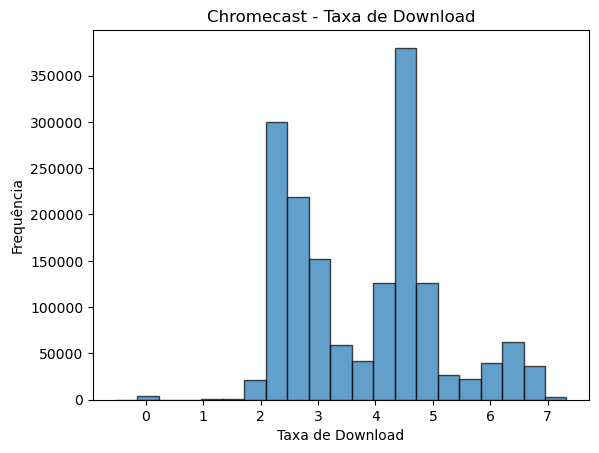

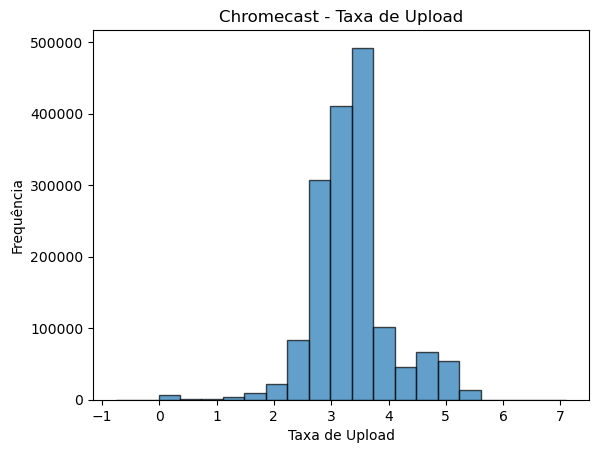

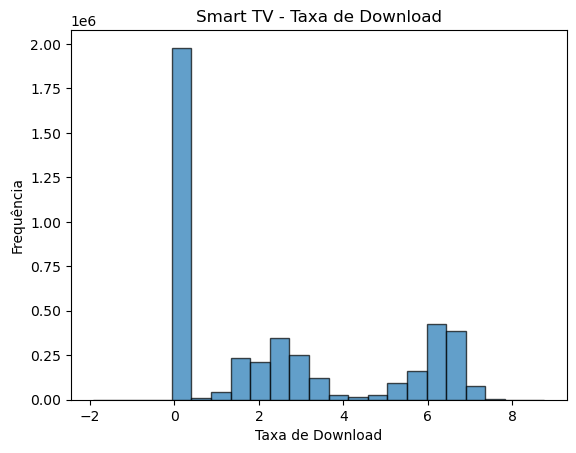

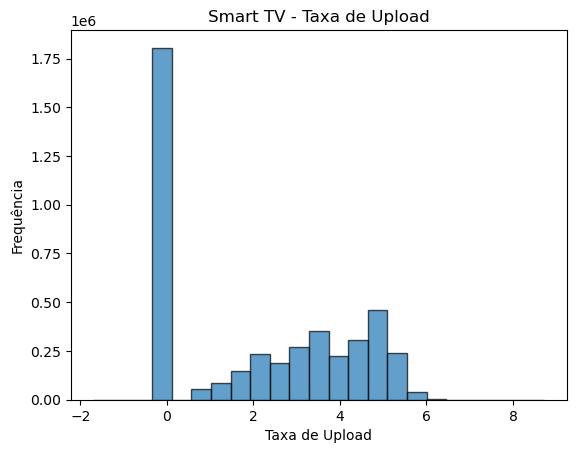

In [4]:
import matplotlib.pyplot as plt

def hist_plot(df, col, device, label):
    # Calcular "bins" usando o método de Sturges
    num_bins = int(1 + np.log2(len(df[col])))

    # Criando o histograma
    plt.hist(df[col], bins=num_bins, edgecolor='black', alpha=0.7)

    plt.xlabel(label)
    plt.ylabel('Frequência')
    plt.title(f'{device} - {label}')
    
    plt.savefig(f'output_data/2_stats_gerais/hist_{device}_{label}.png')
    plt.show()

hist_plot(df_chromecast, 'bytes_down', 'Chromecast', 'Taxa de Download')
hist_plot(df_chromecast, 'bytes_up', 'Chromecast', 'Taxa de Upload')
hist_plot(df_smarttv, 'bytes_down', 'Smart TV', 'Taxa de Download')
hist_plot(df_smarttv, 'bytes_up', 'Smart TV', 'Taxa de Upload')

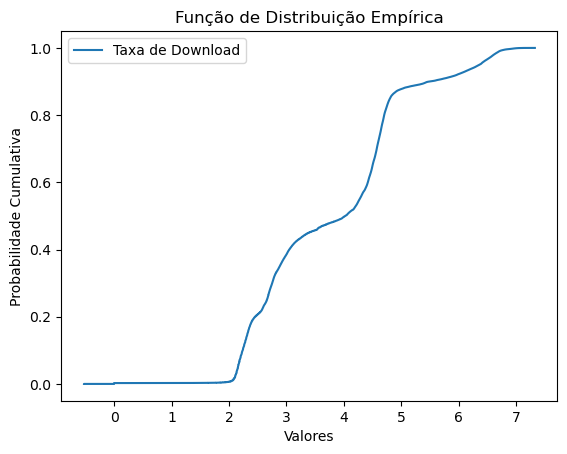

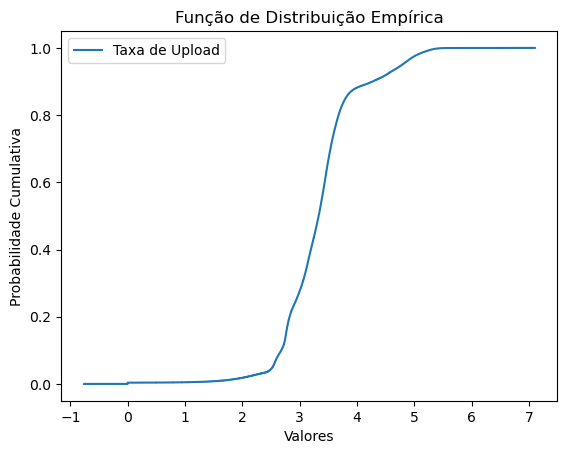

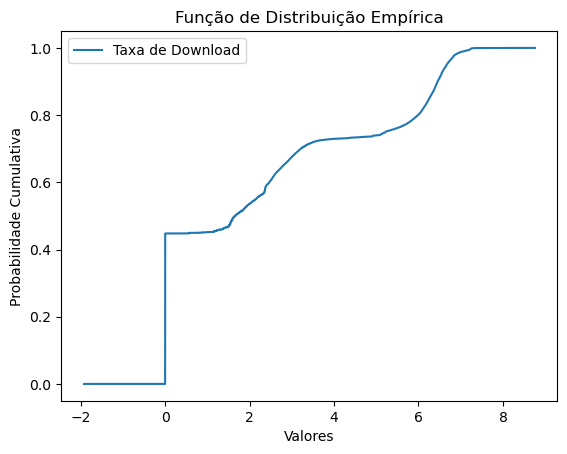

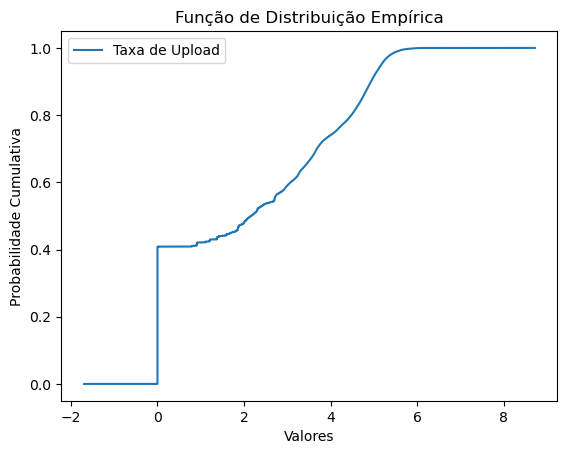

In [5]:
# Função Distribuição Empírica (ECDF)

def ecdf_plot(data, device, label):
    # Ordena os dados em ordem crescente
    x = np.sort(data)
    # Calcula a probabilidade acumulada para cada valor
    y = np.arange(1, len(x) + 1) / len(x)
    
    # Plotando o gráfico
    plt.step(x, y, label=label)

    plt.xlabel('Valores')
    plt.ylabel('Probabilidade Cumulativa')
    plt.title('Função de Distribuição Empírica')
    plt.legend()
    
    plt.savefig(f'output_data/2_stats_gerais/ecdf_{device}_{label}.png')
    plt.show()

ecdf_plot(df_chromecast['bytes_down'], 'Chromecast', 'Taxa de Download')
ecdf_plot(df_chromecast['bytes_up'], 'Chromecast', 'Taxa de Upload')
ecdf_plot(df_smarttv['bytes_down'], 'Smart TV', 'Taxa de Download')
ecdf_plot(df_smarttv['bytes_up'], 'Smart TV', 'Taxa de Upload')

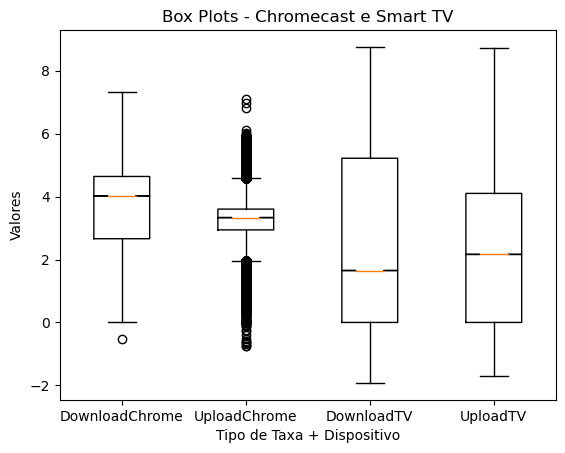

In [6]:

def boxplot(df1, df2, labels):
    # Dados para os box plots
    data_1 = [df1['bytes_down'], df1['bytes_up']]
    data_2 = [df2['bytes_down'], df2['bytes_up']]

    # Rótulos
    box_labels = [labels[0] + 'Chrome', labels[1] + 'Chrome', 
                  labels[0] + 'TV', labels[1] + 'TV']

    # Criando o plot
    fig, ax = plt.subplots()
    ax.boxplot(data_1 + data_2, labels=box_labels, notch=True, showfliers=True)

    plt.xlabel('Tipo de Taxa + Dispositivo')
    plt.ylabel('Valores')
    plt.title('Box Plots - Chromecast e Smart TV')
    
    plt.savefig('output_data/2_stats_gerais/boxplot.png')
    plt.show()
    

labels = ['Download', 'Upload']
boxplot(df_chromecast, df_smarttv, labels)


## 3. Estatísticas por Horário

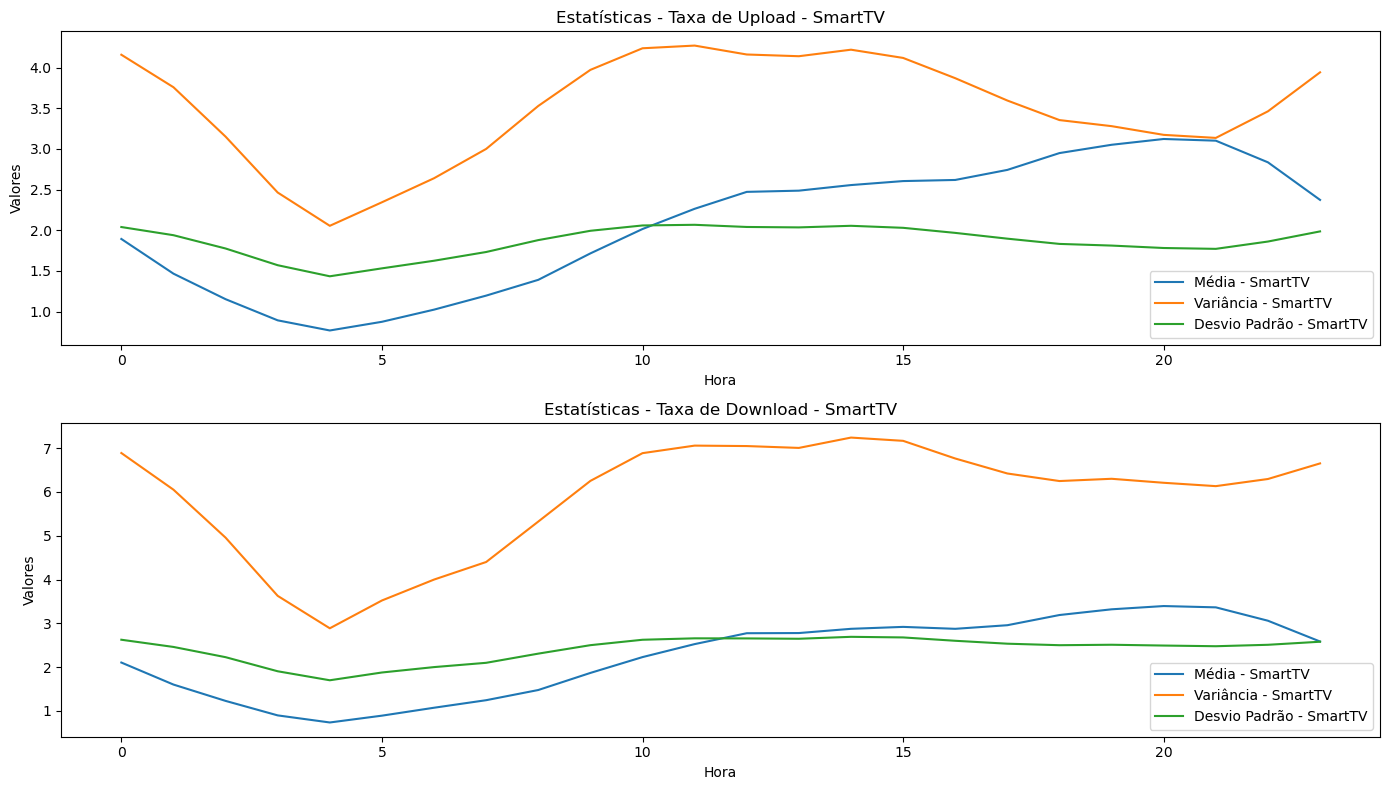

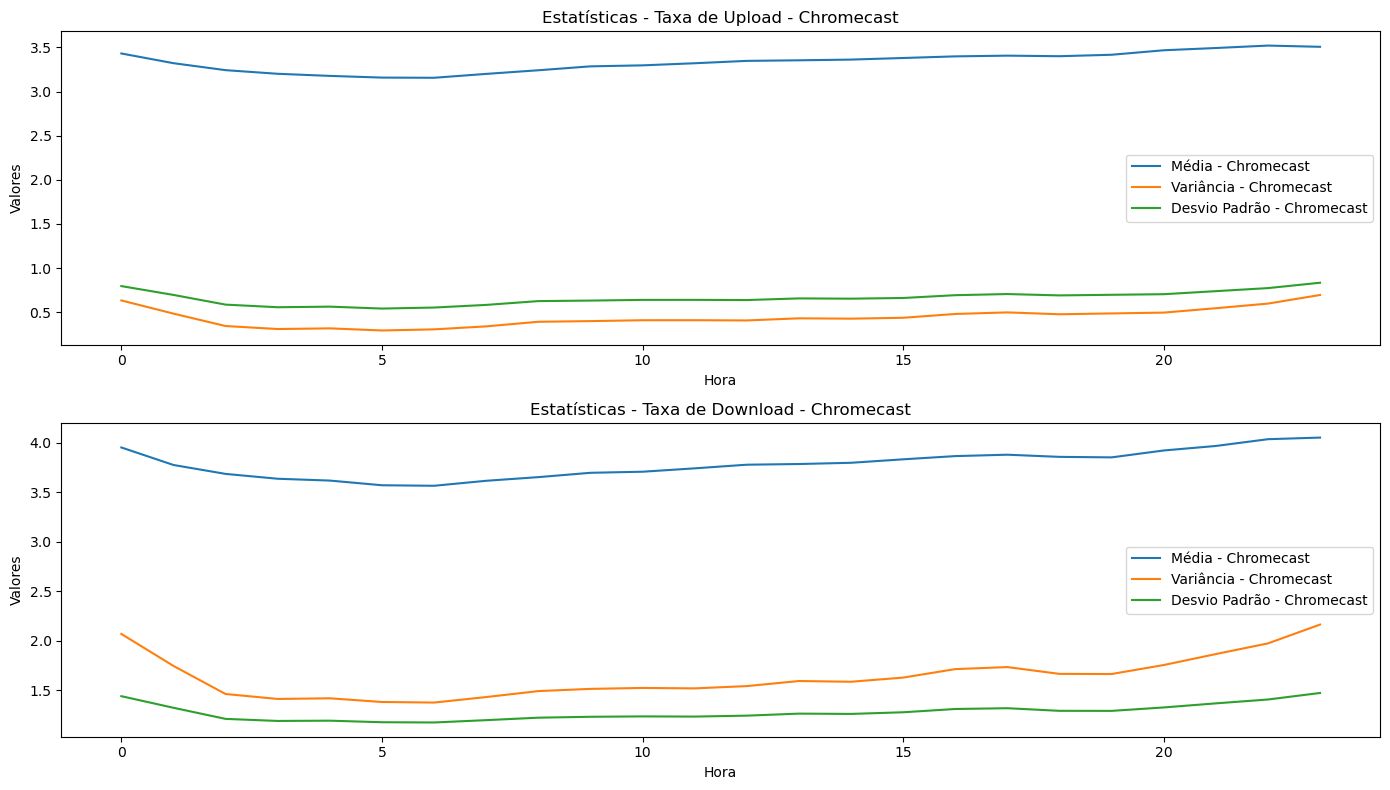

In [7]:
import matplotlib.pyplot as plt

def plot_statistics(df, label):

    # Criando a coluna de horas
    df['date_hour'] = pd.to_datetime(df['date_hour'])
    df['hour'] = df['date_hour'].dt.hour

    grouped_data = df.groupby('hour')

    result_stats = grouped_data.agg({
        'bytes_up': ['mean', 'var', 'std'],
        'bytes_down': ['mean', 'var', 'std']
    }).reset_index()

    # Gráfico
    plt.figure(figsize=(14, 8))

    # Taxa de Upload
    plt.subplot(2, 1, 1)
    plt.plot(result_stats['hour'], result_stats[('bytes_up', 'mean')], label=f'Média - {label}')
    plt.plot(result_stats['hour'], result_stats[('bytes_up', 'var')], label=f'Variância - {label}')
    plt.plot(result_stats['hour'], result_stats[('bytes_up', 'std')], label=f'Desvio Padrão - {label}')
    plt.title(f'Estatísticas - Taxa de Upload - {label}')
    plt.xlabel('Hora')
    plt.ylabel('Valores')
    plt.legend()

    # Taxa de Download
    plt.subplot(2, 1, 2)
    plt.plot(result_stats['hour'], result_stats[('bytes_down', 'mean')], label=f'Média - {label}')
    plt.plot(result_stats['hour'], result_stats[('bytes_down', 'var')], label=f'Variância - {label}')
    plt.plot(result_stats['hour'], result_stats[('bytes_down', 'std')], label=f'Desvio Padrão - {label}')
    plt.title(f'Estatísticas - Taxa de Download - {label}')
    plt.xlabel('Hora')
    plt.ylabel('Valores')
    plt.legend()

    plt.tight_layout()
    plt.savefig(f'output_data/3_stats_p_hora/stats_{label}.png')
    plt.show()


label_smarttv = 'SmartTV'
label_chromecast = 'Chromecast'

# Chama a função para gerar os gráficos para Smart TV
plot_statistics(df_smarttv, label_smarttv)

# Chama a função para gerar os gráficos para Chromecast
plot_statistics(df_chromecast, label_chromecast)